This notebook contains exercises related to Capstone Project 1.

Instacart data structure:
   - orders: list of all orders in the dataset. 1 row per order, includes day of the week and time of the day;
   - order_products train: which products (product_id) were ordered; in which order products were added to the cart, and if the product is re-order (1) or not (0);
   - contain the names of products with their corresponding product_id;
   - order_products prior: the structure is the same as order_product_train.csv;
   - aisles contains the aisles;
   - departments: contains the department names.

In [20]:
# We import the needed packages.
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import csv
import seaborn as sns
sns.set()

In [2]:
# Execute if needed.
# Strings to replace names of files run in online environment.
str_isles = 'aisles.csv'
str_dept = 'departments.csv'
str_prod = 'products.csv'
str_prod_train = 'order_products_train.csv'
str_prod_prior = 'order_products_prior.csv'
str_orders = 'orders.csv'

In [3]:
# Execute if needed.
# Strings for local machine runs
str_isles = 'data/aisles.csv'
str_dept = 'data/departments.csv'
str_prod = 'data/products.csv'
str_prod_train = 'data/order_products_train.csv'
str_prod_prior = 'data/order_products_prior.csv'
str_orders = 'data/orders.csv'

We read the files for data and check them.

For the isles, department frames, we change these into categories.

In [4]:
# isles frame
isles = pd.read_csv(str_isles, index_col='aisle_id')
isles['aisle'].astype('category')
isles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 1 to 134
Data columns (total 1 columns):
aisle    134 non-null object
dtypes: object(1)
memory usage: 1.6+ KB


We change the type of the department data to category.

In [5]:
# department frame dept
dept = pd.read_csv(str_dept, index_col='department_id')
dept.department.astype('category')
dept.head()

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [6]:
# product frame
prod = pd.read_csv(str_prod, index_col='product_id')
prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 1 to 49688
Data columns (total 3 columns):
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [7]:
# train frame
train = pd.read_csv(str_prod_train, index_col='order_id')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 1 to 3421070
Data columns (total 3 columns):
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(3)
memory usage: 42.3 MB


c:\users\sdash_t4f1vsz\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
# prior frame
prior = pd.read_csv(str_prod_prior, nrows=1000000, index_col = ['order_id', 'product_id'])
prior.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1000000 entries, (2, 33120) to (105629, 18557)
Data columns (total 2 columns):
add_to_cart_order    1000000 non-null int64
reordered            1000000 non-null int64
dtypes: int64(2)
memory usage: 23.9 MB


We change eval_set to category. The column has only three values.

In [9]:
orders = pd.read_csv(str_orders, index_col='order_id')
orders.eval_set.astype('category')
orders.head(10)

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2539329,1,prior,1,2,8,NaN
2398795,1,prior,2,3,7,15.0
473747,1,prior,3,3,12,21.0
2254736,1,prior,4,4,7,29.0
431534,1,prior,5,4,15,28.0
3367565,1,prior,6,2,7,19.0
550135,1,prior,7,1,9,20.0
3108588,1,prior,8,1,14,14.0
2295261,1,prior,9,1,16,0.0


Combining train and prior data frames.

In [10]:
# train and prior contain the same type of data. We combine these two for analysis.
combine = pd.concat([prior, train], sort = True)
combine.head()

,add_to_cart_order,product_id,reordered
"(2, 33120)",1,NaN,1
"(2, 28985)",2,NaN,1
"(2, 9327)",3,NaN,0
"(2, 45918)",4,NaN,1
"(2, 30035)",5,NaN,0


We visualize the data.

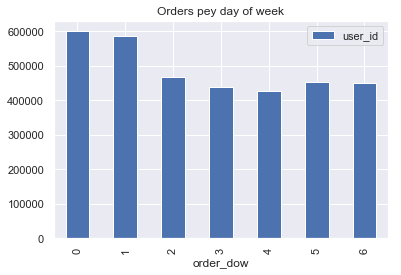

In [21]:
# Visualizing orders by day.
fgroupped_day = orders.groupby('order_dow').count().plot(kind='bar',y='user_id', title='Orders pey day of week')



We check to see data in hourly categories.

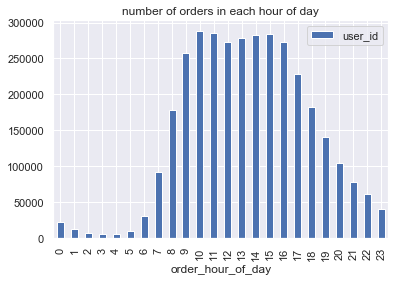

In [22]:
#graphing dayly activities per hour.
orders.groupby('order_hour_of_day').count().plot(kind='bar', y='user_id', title='number of orders in each hour of day')

 We visualize data for inspection.
 
 We see that all orders for 30 days or more are aggregated into a single column.

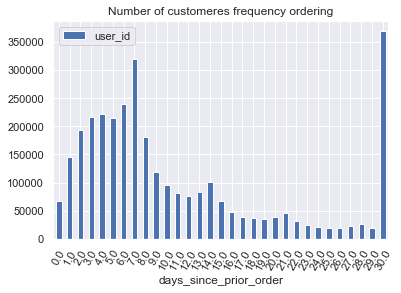

In [23]:
#grouping ordres according to days since prior order
orders.groupby('days_since_prior_order').count().plot(kind='bar', rot=60
                                                         , y='user_id', title='Number of customeres frequency ordering')

We cannot work on pattern where the days are 30 or more, because all orders are aggregated. We are separating these orders from set.

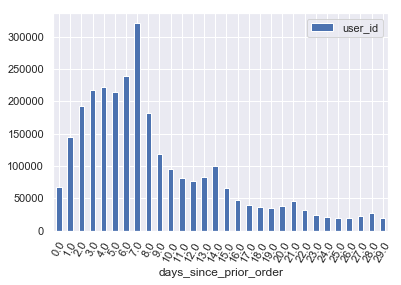

In [24]:
# dropping all observation where days since prior order is 30.
orders_29 = orders.loc[orders['days_since_prior_order'] < 30]
orders_30 = orders.loc[orders['days_since_prior_order']>=30]
orders_29.groupby('days_since_prior_order').count().plot(kind='bar',rot=60, y='user_id')

We save orders in two separate files for further processing: orders_29.csv and orders_30.csv. 

The first file contains all data for orders that are reordes 29 days or less after a prior order. 

The other file contains all orders that are 30 days or more after the previous order.

In [33]:
# saving the separated data in two files for processing
# orders_29.csv and orders_30.csv
fp_orders_29.to_csv('orders_29.csv')
fp_orders_30.to_csv('orders_30.csv')


We investigate relationship between days sinse prior order and number of items purchased. We use trunkated file, because 30 days is an agregate that contains 30 or more days.

In [20]:
str_orders = 'orders_p29.csv'
orders_p29 = pd.read_csv(str_orders, index_col='order_id')
orders_p29.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2702528 entries, 2398795 to 2977660
Data columns (total 5 columns):
user_id                   int64
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(4)
memory usage: 123.7 MB


In [17]:
last_item = prior.groupby('order_id').count()['add_to_cart_order']


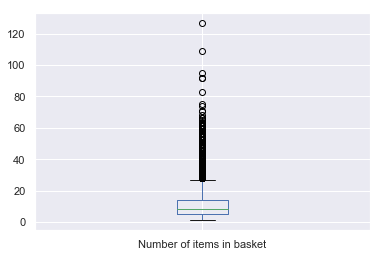

In [25]:
# distribution of how many items in basket. Skewed right.
last_item.plot(kind='box',label='Number of items in basket', )

In [26]:
last_item.describe()

count    99260.000000
mean        10.074552
std          7.515680
min          1.000000
25%          5.000000
50%          8.000000
75%         14.000000
max        127.000000
Name: add_to_cart_order, dtype: float64

We separate all outliers above from the table. We take out all items that are more than 3 sdandard deviation from the mean:
Upper bound = 10.07 + 3*7.51 = 32.6.

In [27]:
# separate all upper outliers
high_orders = last_item.loc[last_item > 33]
high_orders.describe()


count    1256.000000
mean       40.146497
std         7.608500
min        34.000000
25%        35.000000
50%        38.000000
75%        42.000000
max       127.000000
Name: add_to_cart_order, dtype: float64

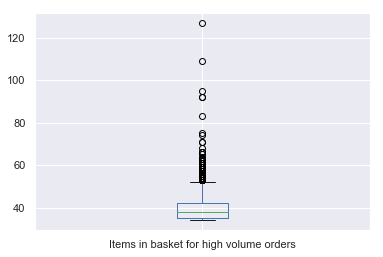

In [29]:
high_orders.plot(kind='box', label='Items in basket for high volume orders')

We look for the outliers for the high volume order, using the bound
40.1 + 3*7.6 = 62.9.

In [34]:
high_orders.loc[high_orders>63].sort_values()

order_id
53650      64
9310       65
13167      66
30842      66
88599      66
12371      68
28332      71
65061      71
38735      74
72118      75
70299      83
45973      92
82167      92
102236     95
77151     109
61355     127
Name: add_to_cart_order, dtype: int64

What percent are the high order items compared to all items ordered?

In [39]:
percent_high_items = high_orders.sum()/last_item.sum()
percent_of_hig = high_orders.count()/last_item.count()
print('The high orders are ' + str(percent_of_hig) + '% from all orders,')
print('but they account for '+ str(percent_high_items) + '% from all items.')

The high orders are 0.012653636913157365% from all orders,
but they account for 0.050424% from all items.


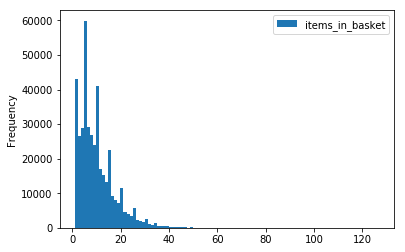

In [26]:
# distribution of number of items in a basket for all orders made prior to 30 days.
orders_p29.plot(kind='hist', y='items_in_basket', bins=100)

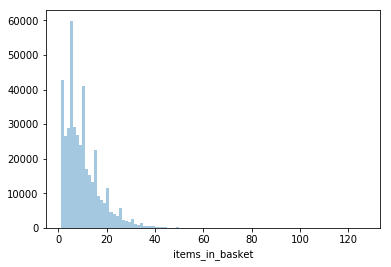

In [30]:
# create seaborn historgram
sns.distplot(orders_p29['items_in_basket'], kde=False, bins=100)

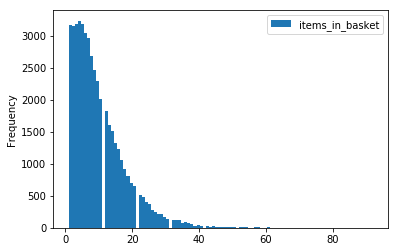

In [21]:
# distribution of number of items ordered when order comes no less than 30 days after prior order. 
str_orders = 'orders_p30.csv'
orders_p30 = pd.read_csv(str_orders, index_col='order_id')
orders_p30['items_in_basket'] = last_item
orders_p30.plot(kind='hist', y='items_in_basket',bins=100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42353 entries, 144358 to 85132
Data columns (total 6 columns):
user_id                   42353 non-null int64
order_number              42353 non-null int64
order_dow                 42353 non-null int64
order_hour_of_day         42353 non-null int64
days_since_prior_order    42353 non-null float64
items_in_basket           42353 non-null float64
dtypes: float64(2), int64(4)
memory usage: 2.3 MB


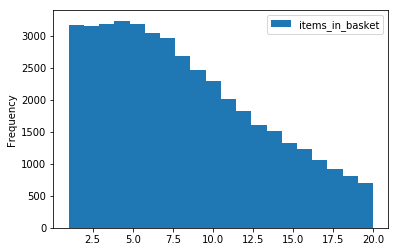

In [41]:
# low orders 30 distribution
low_orders = orders_p30.loc[ (orders_p30['items_in_basket'] < 21)]
low_orders.plot(kind='hist', y='items_in_basket',bins=20)
low_orders.info()

The frequency distribution table below confirms there are no gaps in distribution as shown above.

In [42]:
# check frequency distribution from main graph above.
# remove # to see output.
freq_dist = pd.Series(orders_p30['items_in_basket'])
#freq_dist.value_counts(ascending = True) 

In [43]:
# grouping orders per user.
# we may need the full set of rows from order-product-prior. 
orders_p = pd.read_csv('orders_p.csv')
orders_p['items_in_basket'] = last_item
# %whos

In [44]:
# ???
group_byuser = orders_p.groupby('user_id')['items_in_basket']


In [45]:
# most common orders
most_products = fp_p_prior.groupby('product_id').count()['reordered']
most_reorders = fp_p_prior.groupby('product_id').sum()['reordered']

most_products = pd.merge(left=most_products, right=most_reorders, left_on='product_id', right_on='product_id')
most_products = pd.merge(left=fr_prod['product_name'], right=most_products, left_on='product_id', right_on='product_id')

most_products.sort_values('reordered_x', inplace=True, ascending=False)
most_products.head(30)

,product_name,reordered_x,reordered_y
product_id,,,
24852,Banana,72987,61564
13176,Bag of Organic Bananas,58404,48505
21137,Organic Strawberries,40927,31898
21903,Organic Baby Spinach,37177,28693
47209,Organic Hass Avocado,32817,26024
47766,Organic Avocado,27038,20481
47626,Large Lemon,23682,16463
16797,Strawberries,22055,15364
26209,Limes,21644,14648


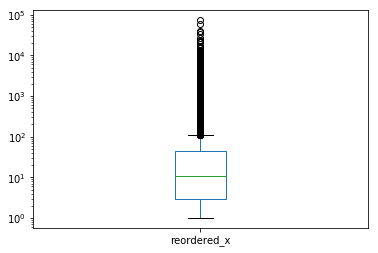

In [51]:
# most ordered products box plot
most_products.plot(kind='box', y='reordered_x', logy=True) # most commonly ordered products

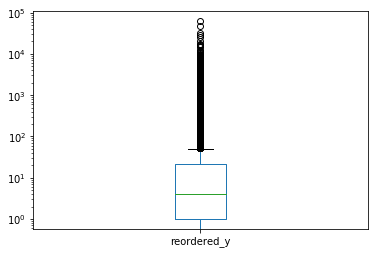

In [53]:
# most reordered products
most_products.plot(kind='box', y='reordered_y', logy=True)

In [47]:
# which product was ordered first
ordered_first = fp_p_prior.loc[fp_p_prior.add_to_cart_order==1]
ordered_first.head()

,,add_to_cart_order,reordered
order_id,product_id,,
2,33120,1,1
3,33754,1,1
4,46842,1,0
5,13176,1,1
6,40462,1,0


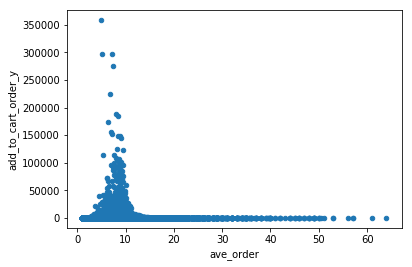

In [48]:
# are more frequent items ordered first?
# number of times an item is ordered, sorted
frequency_count = fp_p_prior.groupby('product_id').count()['add_to_cart_order'].sort_values(ascending=False)
# summing add_to_cart_order to find average order value
sum_add_to_order = fp_p_prior.groupby('product_id')['add_to_cart_order'].sum()

# merging the two data frames.
frequency_count = pd.merge(left=frequency_count, right=sum_add_to_order, left_on='product_id', right_on='product_id')
# new column - ave_order to show when on average in the list the item is ordered.
frequency_count['ave_order'] = frequency_count['add_to_cart_order_y'] / frequency_count['add_to_cart_order_x']

# plotting the ave_order.
frequency_count.plot(kind='scatter', y='add_to_cart_order_y', x='ave_order')

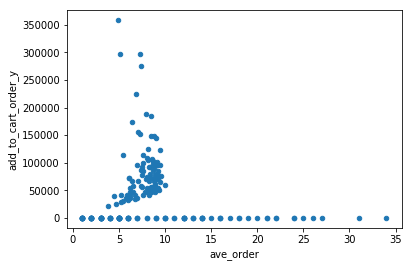

In [49]:
# plotting the top 50 and bottom 50 items from the graph above.
freq_top = frequency_count.head(100)
freq_bot = frequency_count.tail(100)

# concatenating top and bottom parts to plot together.
freq = pd.concat([freq_top, freq_bot], axis=0)
freq.plot(kind='scatter', y='add_to_cart_order_y', x='ave_order')